# Data Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Load the data
df = pd.read_csv('data/training_data.csv')
# Replace low_bike_demand with 0 and high_bike_demand with 1 in increase_stock column
df['increase_stock'] = df['increase_stock'].replace(['low_bike_demand', 'high_bike_demand'], [0, 1])

## General Analysis

In [19]:
display(df.head())
print(f"Number of samples with low bike demand: {len(df[df['increase_stock'] == 0])}")
print(f"Number of samples with high bike demand: {len(df[df['increase_stock'] == 1])}")

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,0


Number of samples with low bike demand: 1312
Number of samples with high bike demand: 288


In [20]:
categorical_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime']
numerical_features = ['temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

In [21]:
# Analyze the numerical features
# for all samples
print('All samples:')
display(df[numerical_features].describe())
# for the low bike demand samples
print('Low bike demand samples:')
display(df[df['increase_stock'] == 0][numerical_features].describe())
# for the high bike demand samples
print('High bike demand samples:')
display(df[df['increase_stock'] == 1][numerical_features].describe())

All samples:


,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


Low bike demand samples:


,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.0,1312.000000,1312.000000,1312.000000,1312.000000
mean,13.748018,7.127744,66.686723,0.147613,0.0,0.052088,12.733689,65.020808,15.220655
std,9.086873,10.264719,18.359226,1.014424,0.0,0.464641,7.869578,33.323211,2.506061
min,-9.100000,-18.400000,17.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,6.000000,-1.425000,51.650000,0.000000,0.0,0.000000,7.300000,28.000000,16.000000
50%,13.200000,7.100000,69.020000,0.000000,0.0,0.000000,11.650000,79.300000,16.000000
75%,21.600000,16.700000,82.462500,0.000000,0.0,0.000000,17.025000,94.600000,16.000000
max,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.700000,100.000000,16.000000


High bike demand samples:


,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,288.000000,288.000000,288.000000,288.000000,288.0,288.0,288.000000,288.000000,288.000000
mean,21.871875,10.588889,51.359618,0.005552,0.0,0.0,14.671528,61.140625,15.906597
std,6.836911,8.302929,17.180008,0.067276,0.0,0.0,7.016026,29.841119,1.004446
min,4.300000,-12.200000,15.850000,0.000000,0.0,0.0,0.000000,0.000000,0.100000
25%,16.350000,4.275000,38.762500,0.000000,0.0,0.0,9.900000,32.700000,16.000000
50%,22.200000,12.200000,49.425000,0.000000,0.0,0.0,14.500000,79.300000,16.000000
75%,27.100000,17.300000,63.710000,0.000000,0.0,0.0,18.325000,84.700000,16.000000
max,35.500000,24.200000,96.980000,1.116000,0.0,0.0,43.800000,100.000000,16.000000


## Analyze the impact of the different features

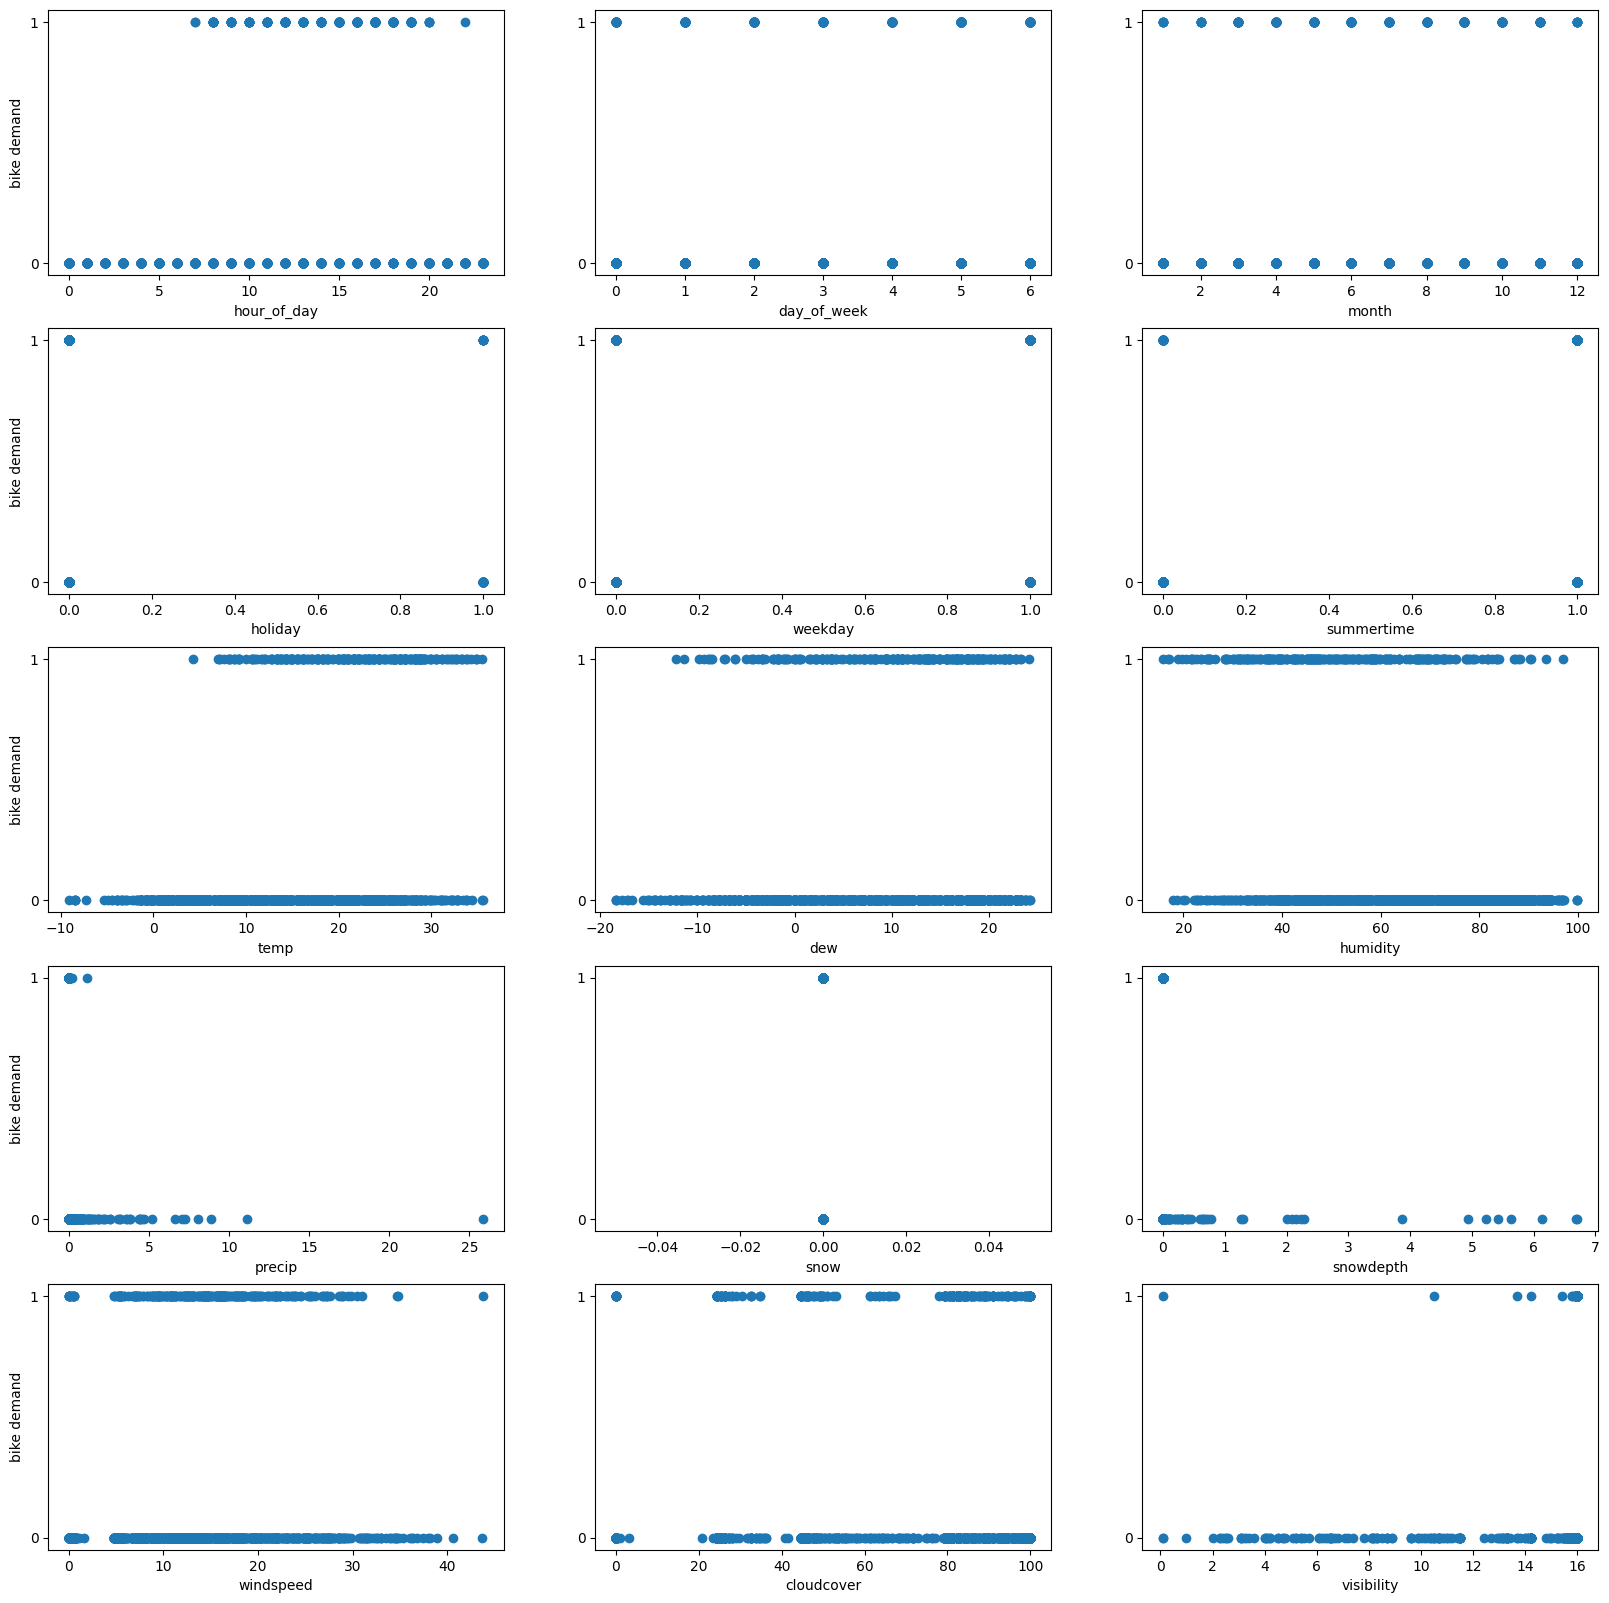

In [22]:
# plot the increase_stock for every other column
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[0:-1]):
    plt.subplot(5, 3, i+1)
    plt.scatter(df[col], df['increase_stock'])
    plt.yticks([0, 1])
    plt.xlabel(col)
    if i%3 == 0:
        plt.ylabel('bike demand')
plt.show()

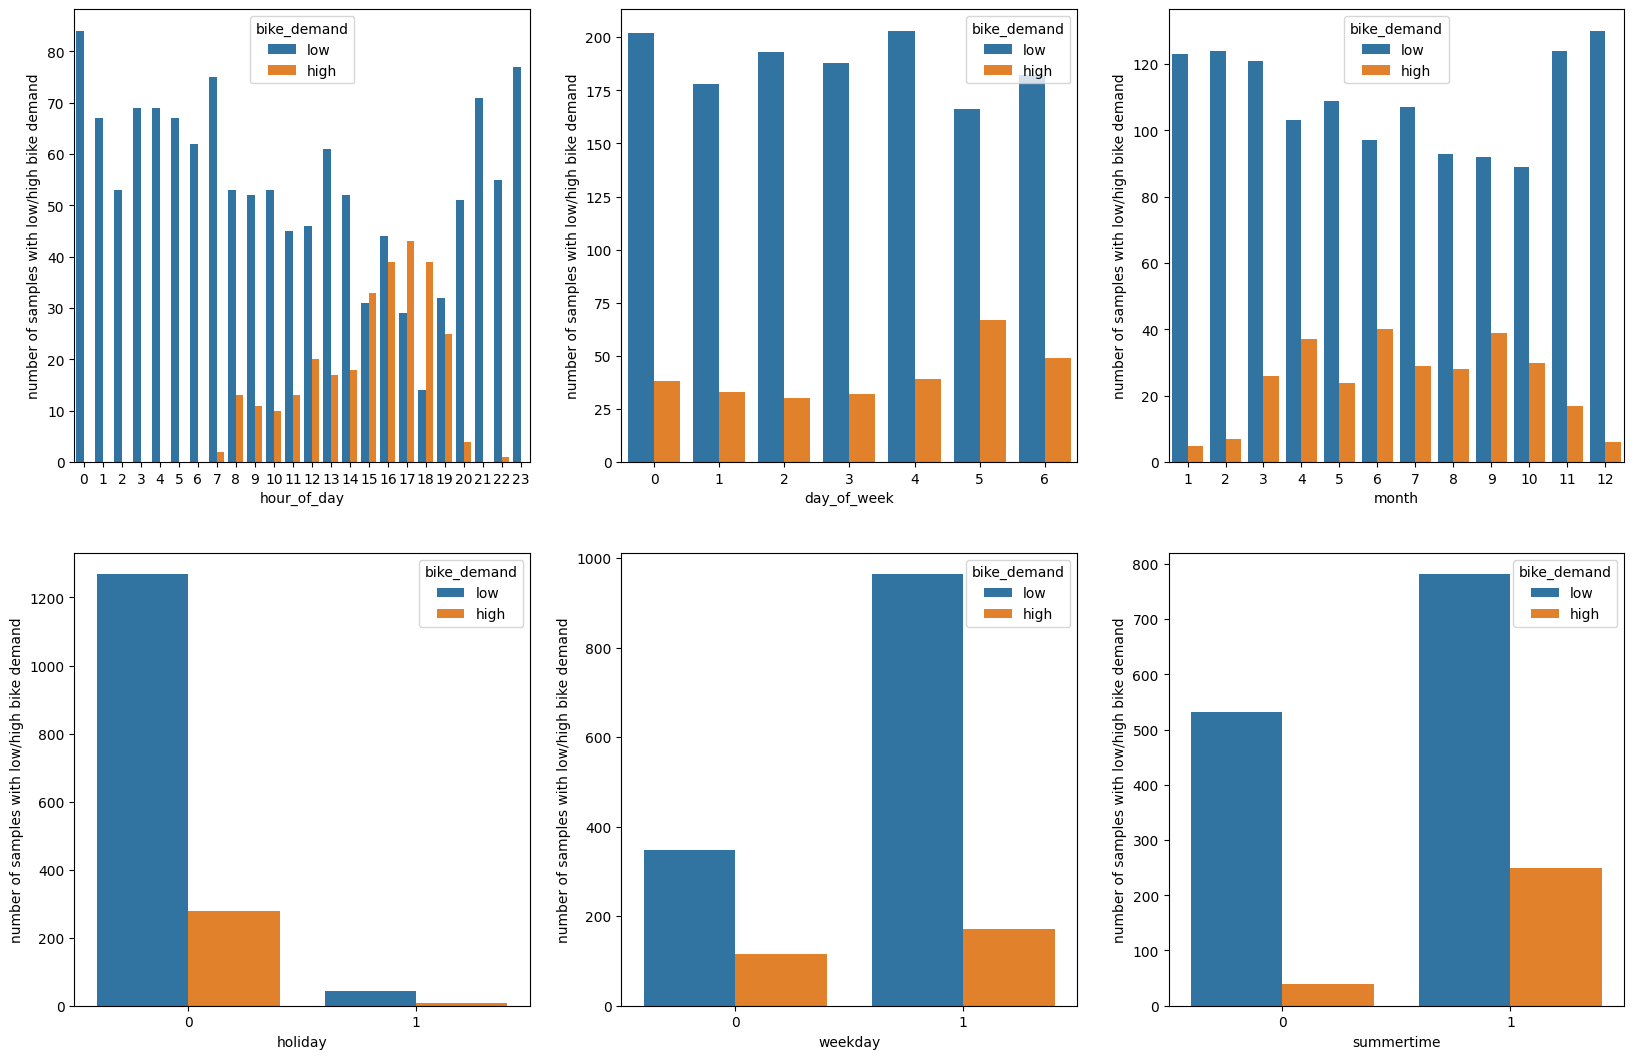

In [23]:
# Plot for each categorical feature a bar chart with the number of samples for the two increase_stock values
df_copy = df.copy()
df_copy['bike_demand'] = df_copy['increase_stock'].replace([0, 1], ['low', 'high'])
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='bike_demand', data=df_copy)
    plt.xlabel(col)
    plt.ylabel('number of samples with low/high bike demand')

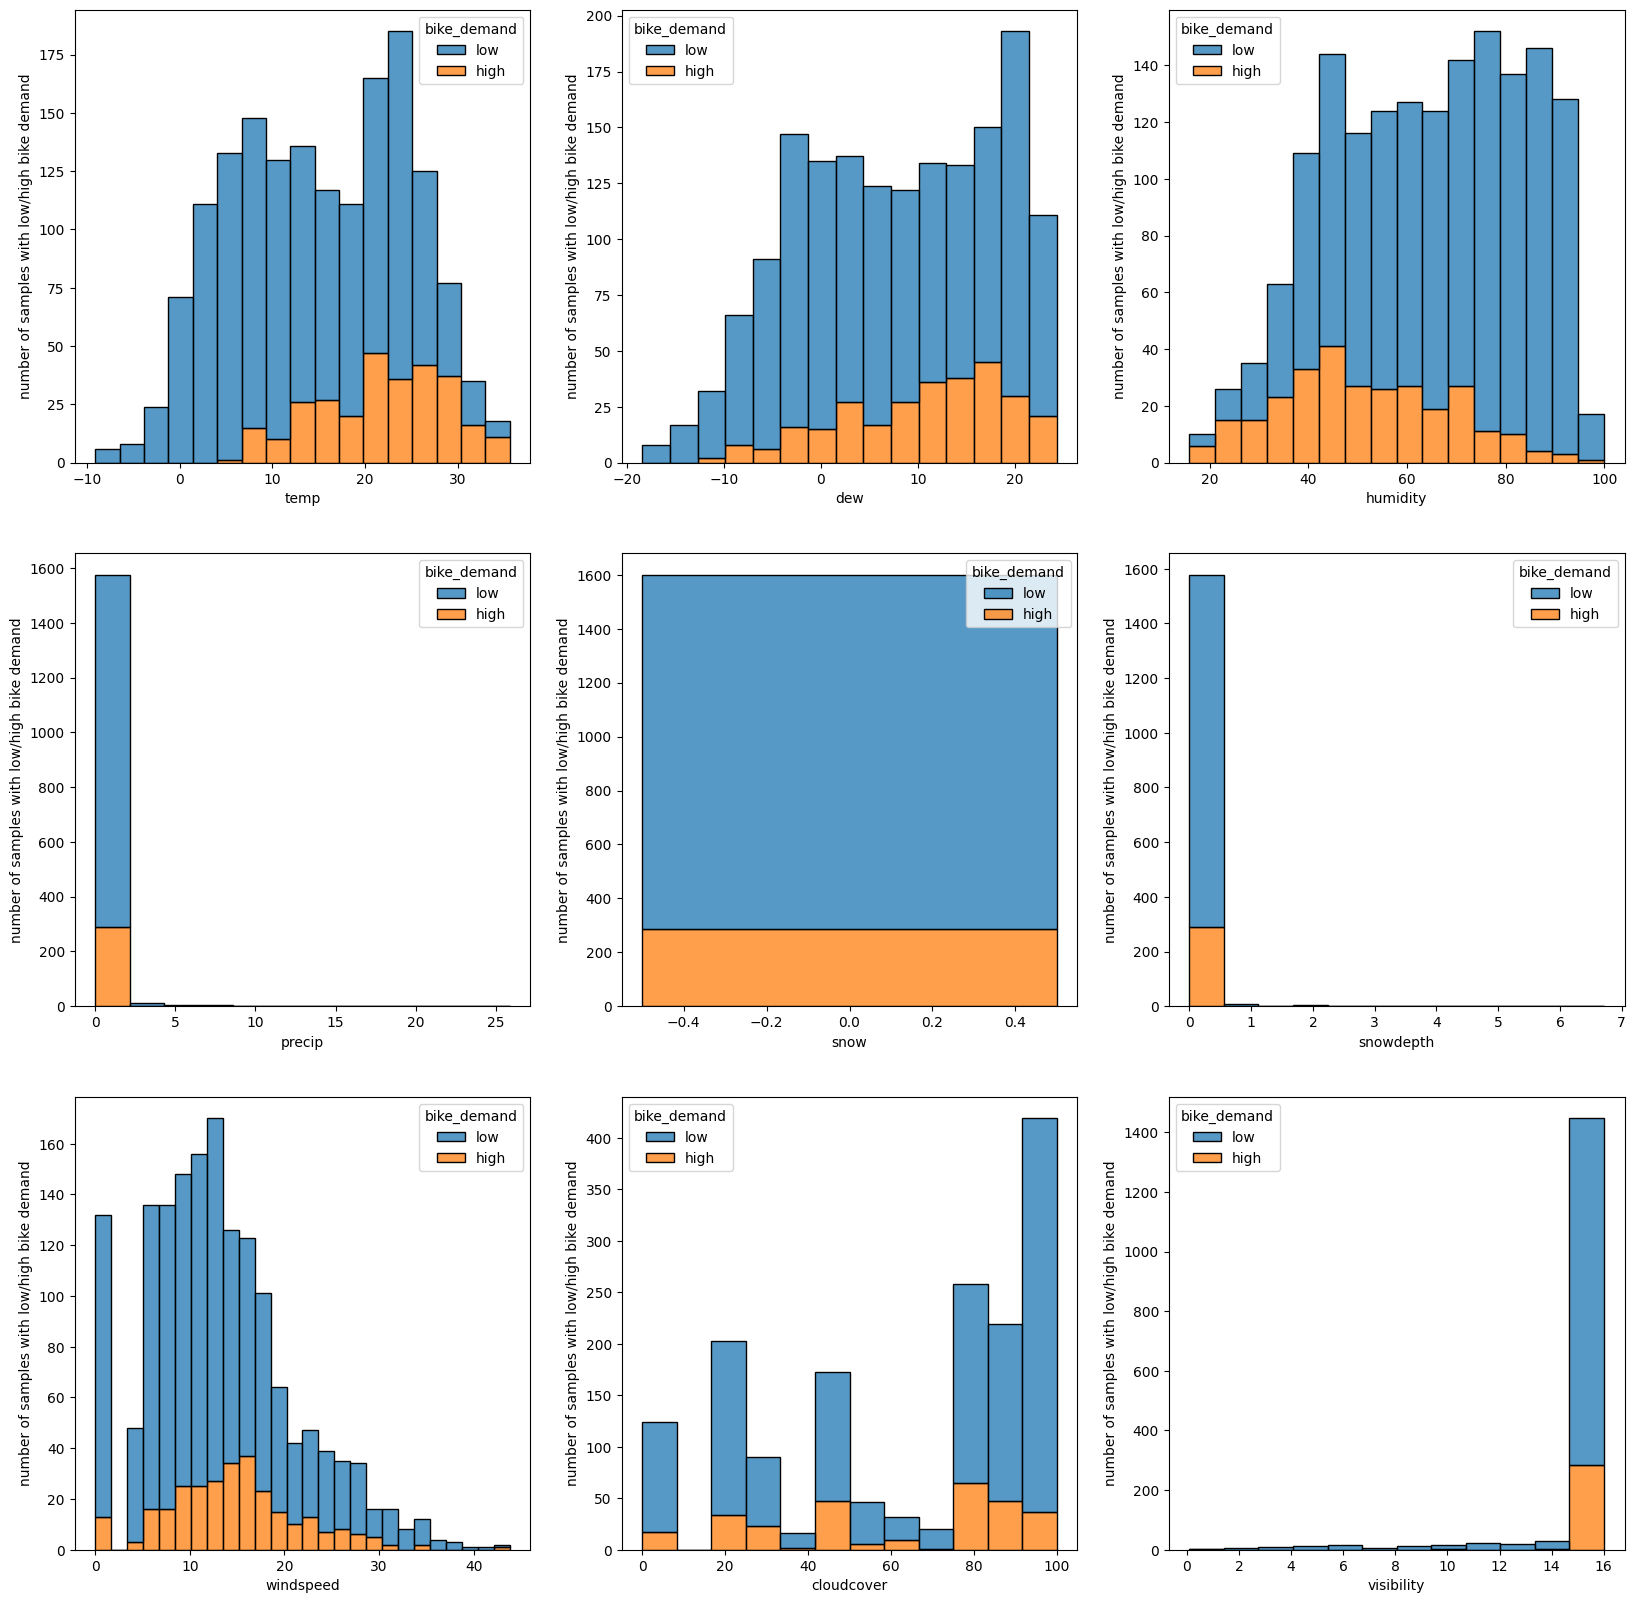

In [24]:
# Plot for each numerical feature a histogram with the number of samples for the two increase_stock values
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df_copy, x=col, hue='bike_demand', multiple='stack')
    plt.xlabel(col)
    plt.ylabel('number of samples with low/high bike demand')

## Correlation Analysis

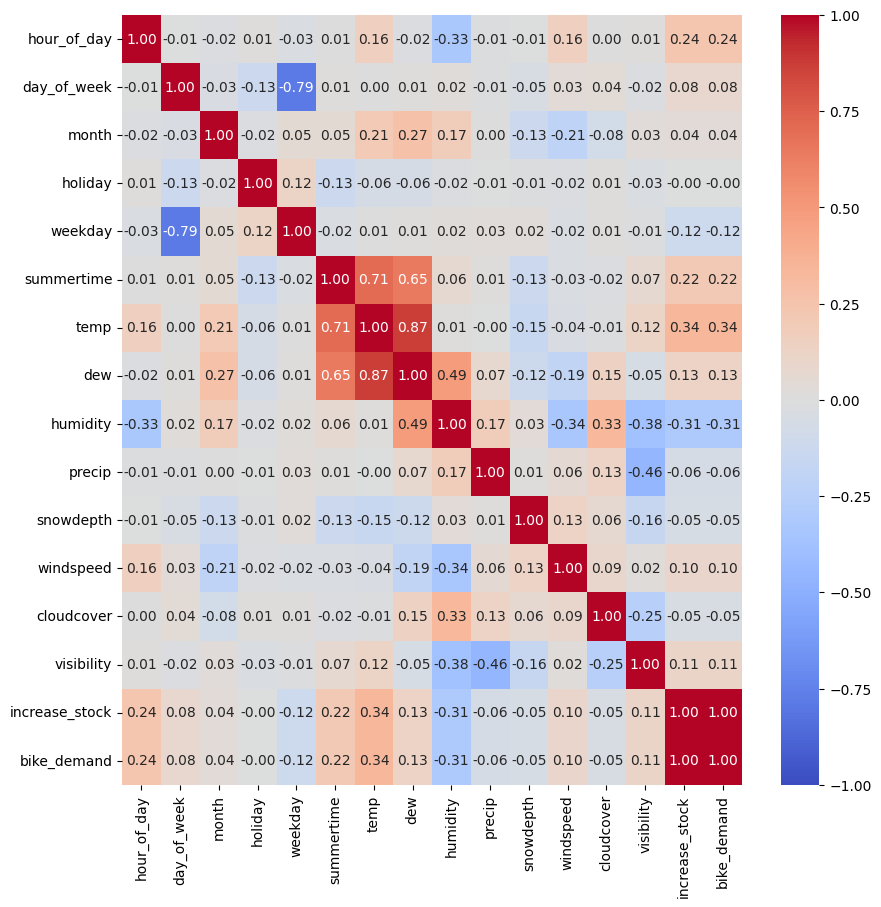

In [25]:
# Plot the correlation matrix
df_copy['bike_demand'] = df_copy['bike_demand'].replace(['low', 'high'], [0, 1])
plt.figure(figsize=(10, 10))
sns.heatmap(df_copy.drop(columns='snow', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.show()

## Feature creation

Add the following columns:
- daytime (replace hour_of_day)

Remove the following columns:
- hour_of_day (replaced by daytime)
- snow (always 0 --> no impact)
- day_of_week (already covered by weekday)
- month (already covered by summertime)
- holiday (no impact)
- dew (high correlation to temp and humidity)
- precip, snowdepth, cloudcover too? (low correlation with increase_stock)

In [26]:
# split daytime into 3 values 0, 0.5, 1 depending on the hour of the day
df['daytime'] = df['hour_of_day'].apply(lambda x: 1 if 15 <= x <= 19 else 0.5 if 8 <= x <= 14 else 0)

<Axes: xlabel='daytime', ylabel='count'>

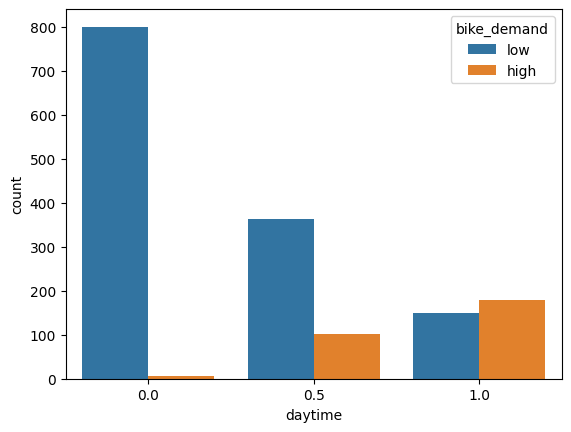

In [27]:
df_copy = df.copy()
df_copy['bike_demand'] = df_copy['increase_stock'].replace([0, 1], ['low', 'high'])
sns.countplot(x='daytime', hue='bike_demand', data=df_copy)

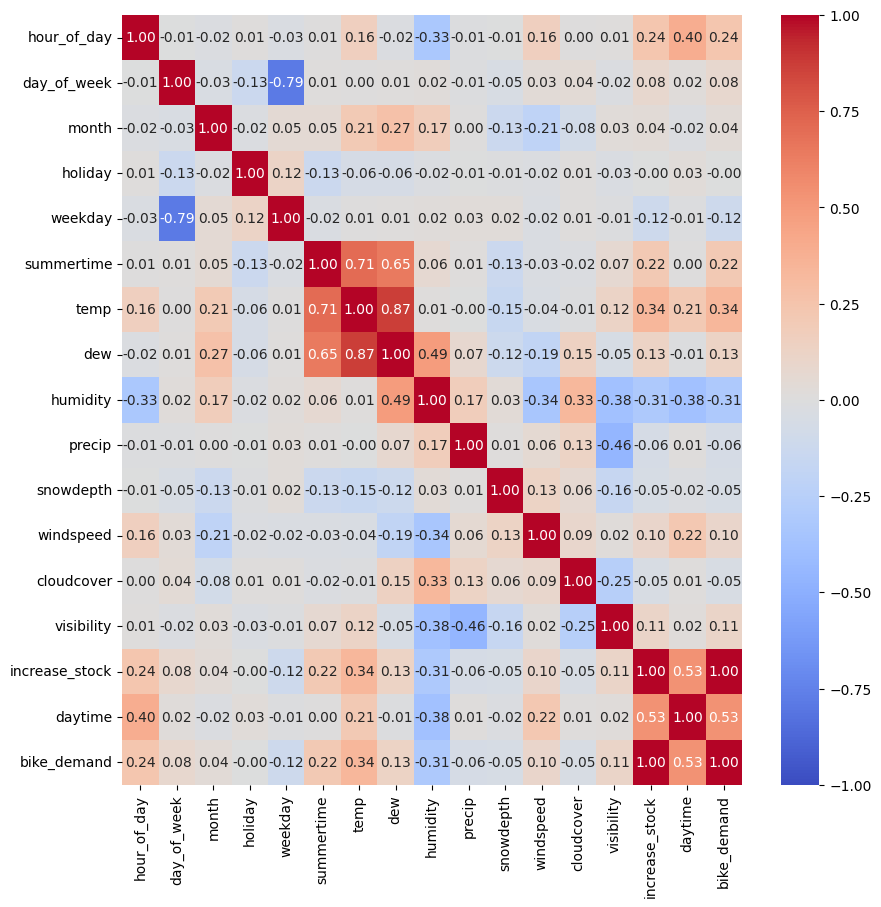

In [28]:
# Plot again the correlation matrix
df_copy['bike_demand'] = df_copy['bike_demand'].replace(['low', 'high'], [0, 1])
plt.figure(figsize=(10, 10))
sns.heatmap(df_copy.drop(columns='snow', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [29]:
df.drop(columns=['snow', 'hour_of_day', 'day_of_week', 'month', 'holiday', 'dew', 'precip', 'snowdepth', 'cloudcover'], axis=1, inplace=True)
display(df.head())

,weekday,summertime,temp,humidity,windspeed,visibility,increase_stock,daytime
0,0,0,-7.2,53.68,16.3,16.0,0,0.0
1,1,0,-1.3,40.97,23.9,16.0,0,0.0
2,1,1,26.9,73.39,0.0,16.0,0,0.0
3,0,0,3.1,59.74,19.2,16.0,0,0.0
4,1,0,11.7,18.71,10.5,16.0,0,1.0


## Split in train and validation data set

In [30]:
train, valid = train_test_split(df, test_size=0.1, random_state=42, stratify=df['increase_stock'])
categorical_features = ['weekday', 'summertime', 'daytime']
numerical_features = ['temp', 'humidity', 'windspeed', 'visibility']

## Normalize the numerical features

In [31]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train[numerical_features])
train[numerical_features] = min_max_scaler.transform(train[numerical_features])
valid[numerical_features] = min_max_scaler.transform(valid[numerical_features])

In [32]:
display(train.head())

,weekday,summertime,temp,humidity,windspeed,visibility,increase_stock,daytime
1012,0,1,0.736018,0.934436,0.239726,1.0,0,0.0
1441,1,0,0.288591,0.466802,0.337900,1.0,0,0.0
765,0,1,0.733781,0.766897,0.308219,1.0,0,0.0
849,1,1,0.782998,0.369348,0.203196,1.0,1,1.0
1313,0,1,0.760626,0.636364,0.152968,1.0,0,0.0


In [33]:
train.to_csv('data/train.csv', index=False)
valid.to_csv('data/valid.csv', index=False)